# Section 1: Project Setup & Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.feature_selection import RFE 
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [2]:
df=pd.read_csv("credit_risk_data.csv")
df.head()

,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,High School,Married,3.5,0
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,Masters,Divorced,11.4,0
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,High School,Widowed,8.6,0
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,Bachelors,Single,3.9,0
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,Associates,Single,9.6,0


In [3]:
df  

,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,High School,Married,3.5,0
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,Masters,Divorced,11.4,0
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,High School,Widowed,8.6,0
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,Bachelors,Single,3.9,0
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,Associates,Single,9.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,APP_430,2024-12-28,500000.00,149929.96,8.5,0.877,668,0.431,0.669,0,0.206,0.541,133620.25,35,Bachelors,Single,8.4,0
2496,APP_2040,2024-12-29,38284.25,63593.34,1.0,0.411,609,0.838,0.242,3,0.896,0.074,2106.29,46,Associates,Single,3.2,1
2497,APP_1693,2024-12-29,166329.17,75670.19,2.1,0.684,672,0.499,0.995,1,0.518,0.234,857465.15,40,Masters,Married,8.7,0
2498,APP_460,2024-12-29,43779.56,34662.35,0.7,0.127,534,0.776,0.463,2,0.698,0.021,48734.10,25,High School,Married,7.3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         2500 non-null   object 
 1   application_date       2500 non-null   object 
 2   loan_amount            2500 non-null   float64
 3   annual_income          2500 non-null   float64
 4   employment_years       2500 non-null   float64
 5   job_stability_score    2500 non-null   float64
 6   credit_score           2500 non-null   int64  
 7   credit_utilization     2500 non-null   float64
 8   payment_history_score  2500 non-null   float64
 9   open_credit_lines      2500 non-null   int64  
 10  debt_to_income_ratio   2500 non-null   float64
 11  savings_ratio          2500 non-null   float64
 12  asset_value            2500 non-null   float64
 13  age                    2500 non-null   int64  
 14  education_level        2500 non-null   object 
 15  mari

In [5]:
df.describe()

,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,residential_stability,loan_status
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,155716.305344,67707.807596,6.675640,0.634643,681.728400,0.358176,0.740733,3.451600,0.408094,0.320784,175666.741236,42.045600,6.023200,0.265600
std,149605.357952,27302.931731,3.488021,0.293276,88.683309,0.289995,0.285966,2.083793,0.224736,0.192079,182652.568930,12.092395,3.205397,0.441741
min,5000.000000,15000.000000,0.000000,0.011000,334.000000,0.004000,0.029000,0.000000,0.009000,0.000000,550.630000,18.000000,0.000000,0.000000
25%,42984.517500,47475.317500,4.000000,0.375500,642.750000,0.131000,0.517500,2.000000,0.228000,0.161000,49513.082500,34.000000,3.600000,0.000000
50%,97054.315000,66963.475000,6.700000,0.752000,700.000000,0.246000,0.880500,3.000000,0.359000,0.327000,121018.750000,42.000000,5.900000,0.000000
75%,213214.992500,87347.642500,9.300000,0.866000,743.000000,0.592250,0.956000,5.000000,0.565000,0.464000,235513.902500,50.000000,8.400000,1.000000
max,500000.000000,149929.960000,19.300000,0.999000,850.000000,0.998000,1.000000,11.000000,0.979000,0.893000,1000000.000000,75.000000,16.400000,1.000000


#### **Descubrimientos Iniciales:**

- La base not tiene valores nulos
- Los registros van desde 2022 a 2024
- La cantidad mínima de prestamo a evaluar es $5,000 y la máxima $50,000
- La cantidad en préstamos suele variar (puede haber unos muy altos y otros muy pequeños)
- La edad mínima de clientes evaluados es de 18 y la máxima es de 75
- El 50% de los evaluados tienen un ingreso anual menor o igual a $66,963

# Section 2: Exploratory Data Analysis (EDA)

Análisis de la Variable Objetivo (loan_status):
Tasa de Default Exacta: 26.56%


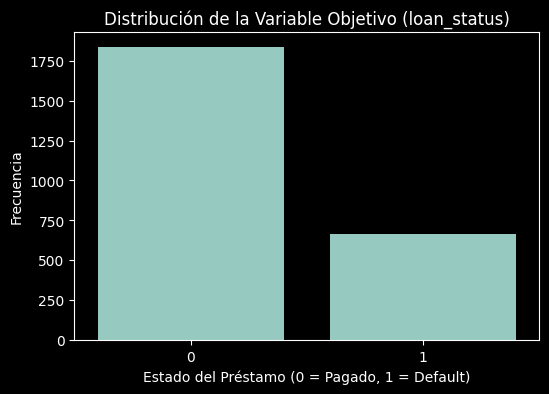

In [6]:
print("Análisis de la Variable Objetivo (loan_status):")

# Calcular la tasa de default exacta
default_rate = df['loan_status'].mean()
print(f"Tasa de Default Exacta: {default_rate:.2%}")

# Graficar la distribución de loan_status
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df)
plt.title('Distribución de la Variable Objetivo (loan_status)')
plt.xlabel('Estado del Préstamo (0 = Pagado, 1 = Default)')
plt.ylabel('Frecuencia')
plt.show()

Análisis de Variables Continuas (Comparación 0 vs 1)


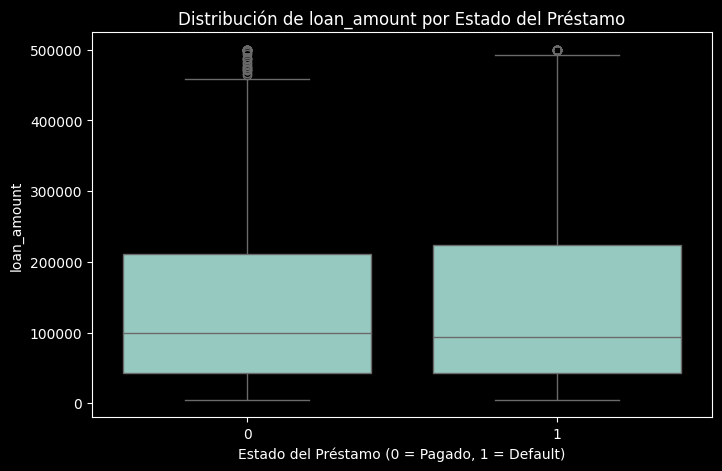

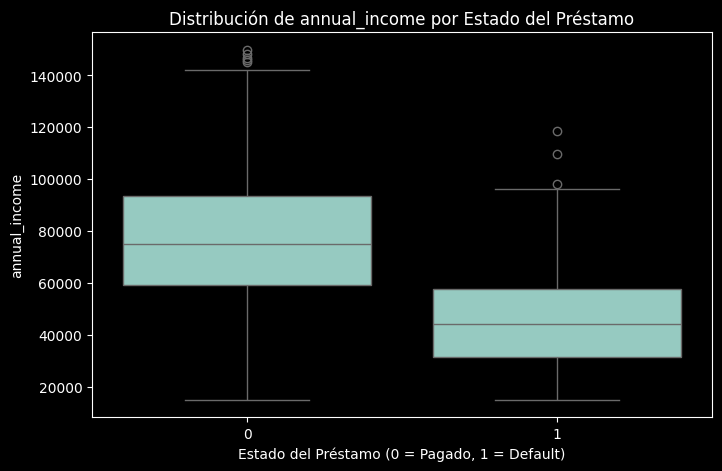

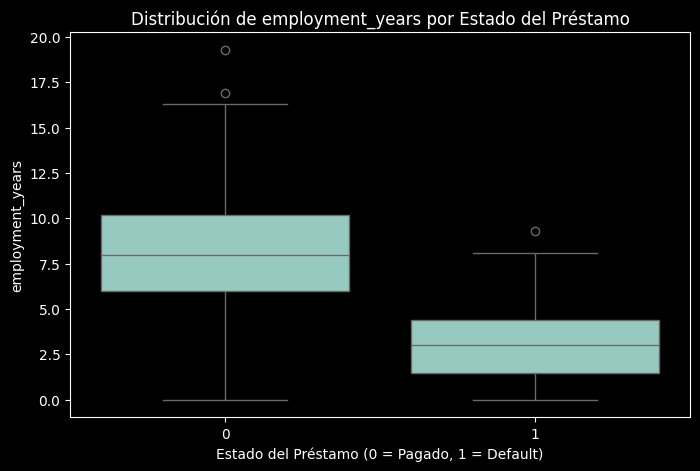

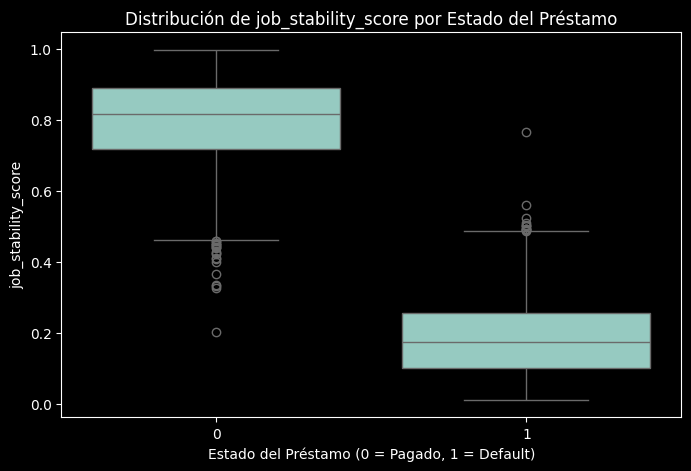

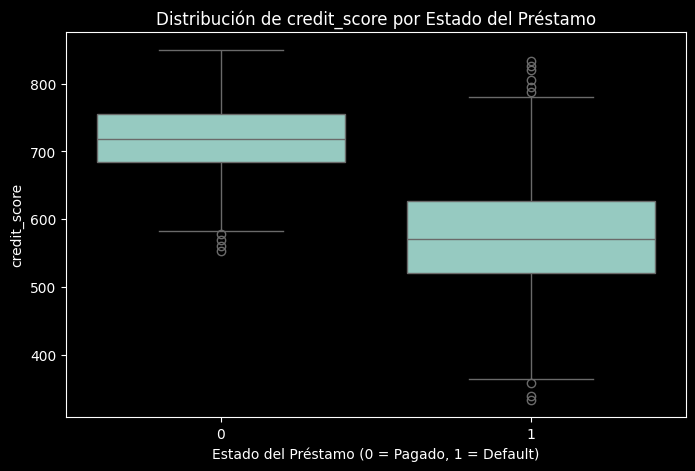

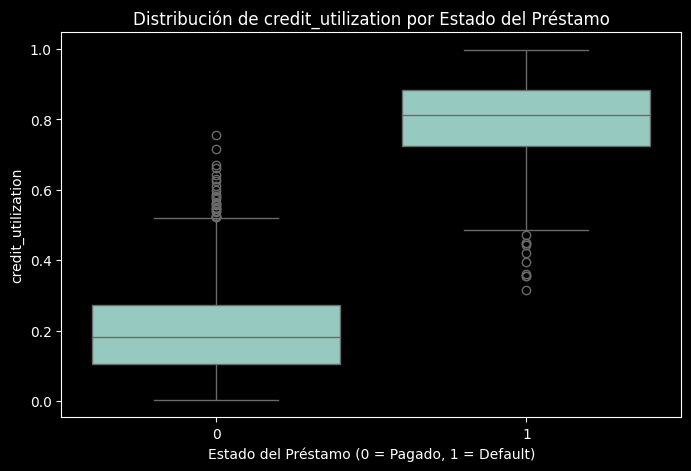

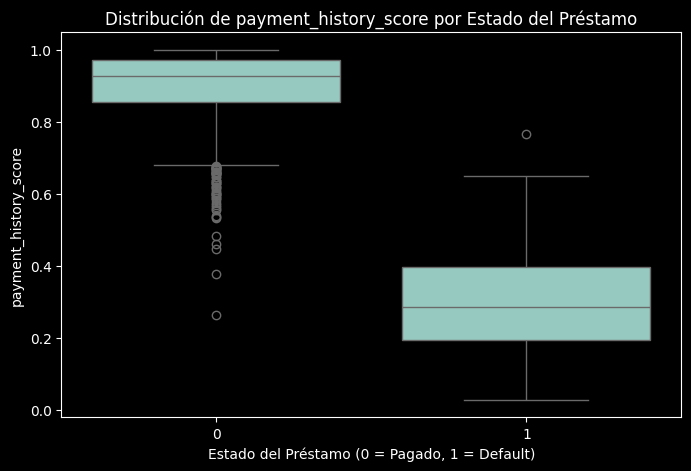

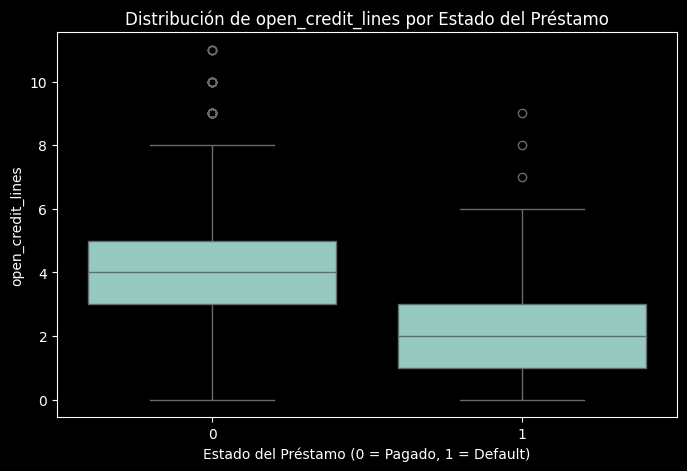

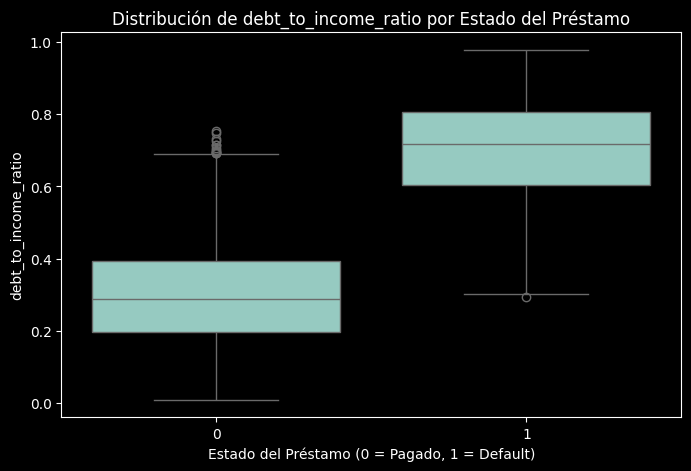

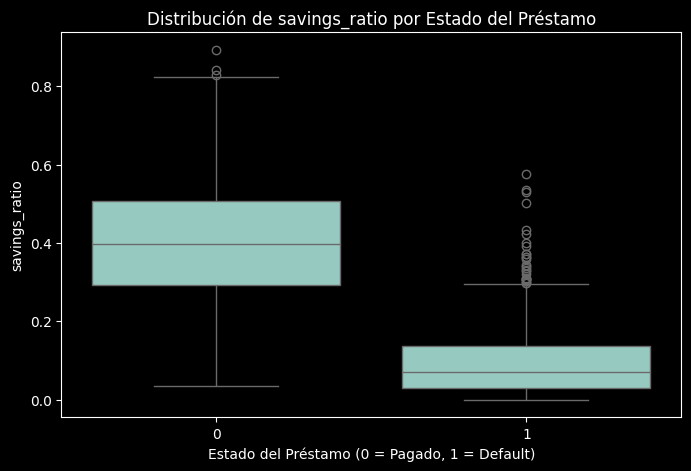

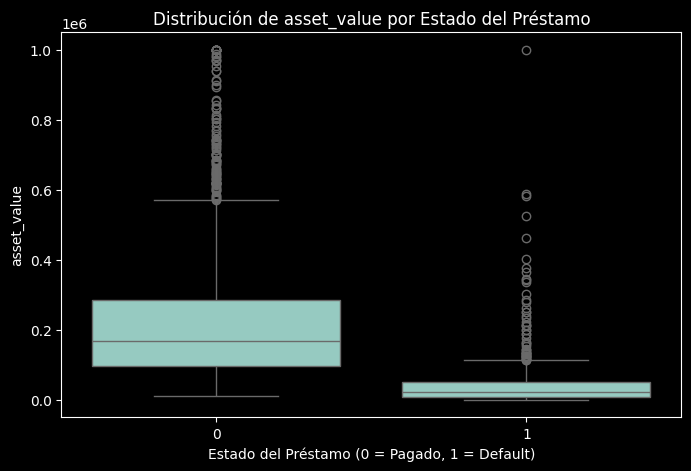

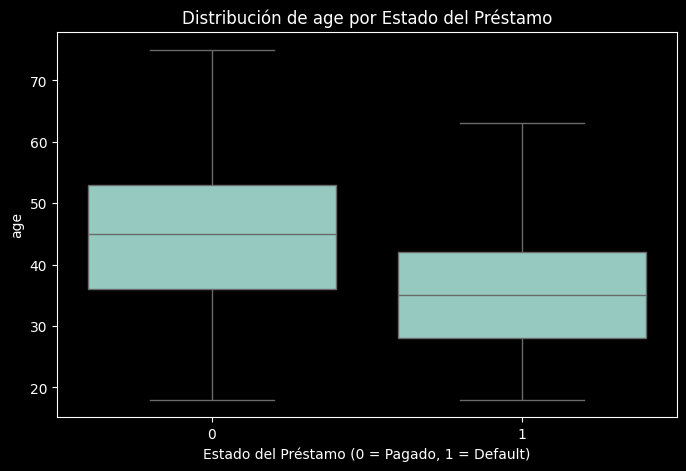

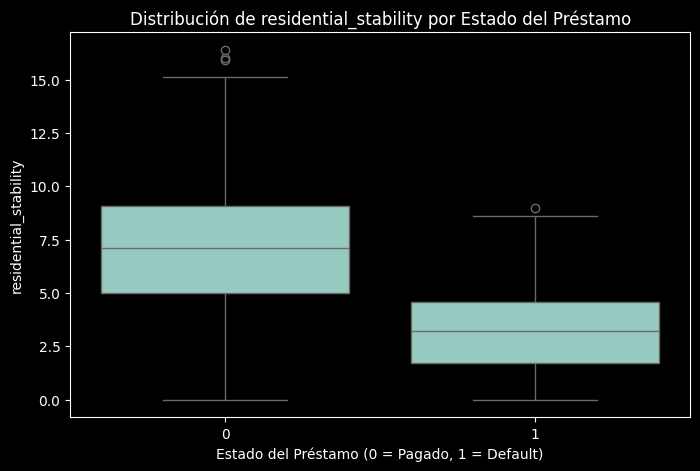

In [7]:
print("Análisis de Variables Continuas (Comparación 0 vs 1)")

# Lista de predictores continuos clave (basado en el diccionario de datos)
df_drop_ls = df.drop(columns=['loan_status'])
continuous_vars = df_drop_ls.select_dtypes(exclude=["object"]).columns 

# Crear box plots para cada variable continua clave
for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='loan_status', y=var, data=df)
    plt.title(f'Distribución de {var} por Estado del Préstamo')
    plt.xlabel('Estado del Préstamo (0 = Pagado, 1 = Default)')
    plt.ylabel(var)
    plt.show()

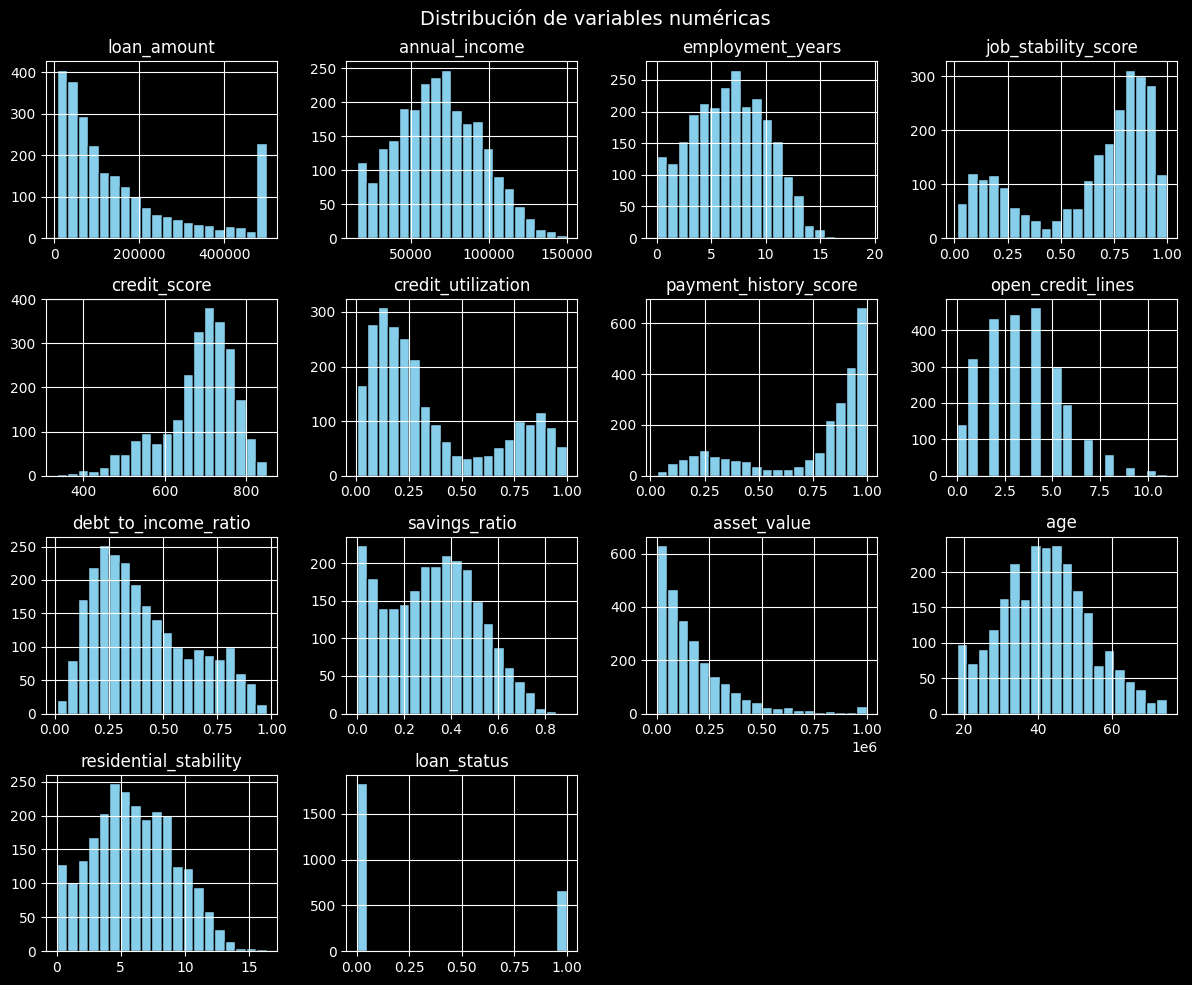

In [8]:
num_cols= df.select_dtypes(exclude=["object"]).columns 

df[num_cols].hist(figsize=(12,10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\maulo\AppData\Local\Temp\ipykernel_36132\3567270079.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=education_default, x='education_level', y='loan_status', palette='viridis')
C:\Users\maulo\AppData\Local\Temp\ipykernel_36132\3567270079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=marital_default, x='marital_status', y='loan_status', palette='magma')


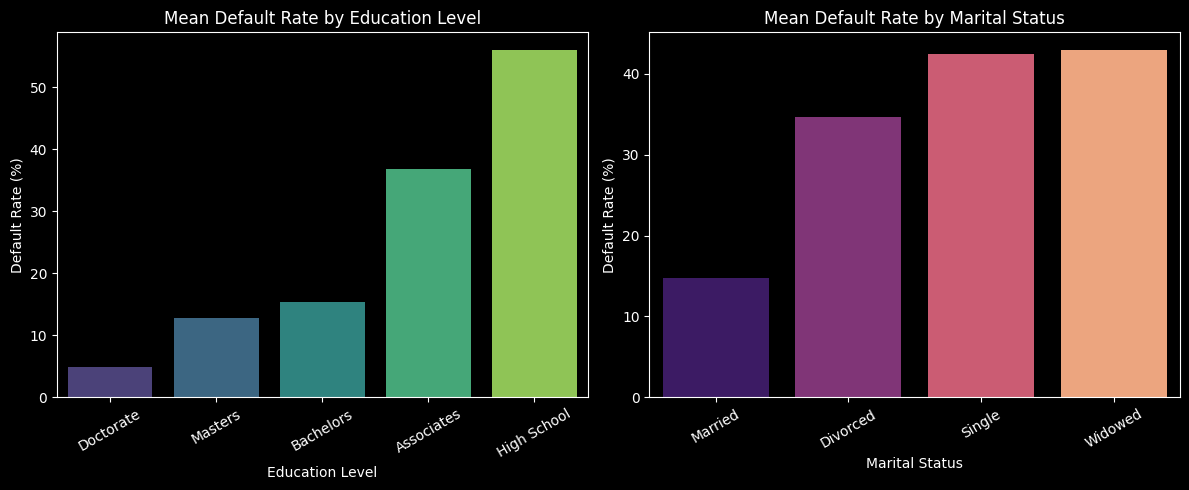

In [9]:
education_default = df.groupby('education_level')['loan_status'].mean().sort_values().reset_index()
marital_default = df.groupby('marital_status')['loan_status'].mean().sort_values().reset_index()

# Convertir a porcentaje
education_default['loan_status'] = education_default['loan_status'] * 100
marital_default['loan_status'] = marital_default['loan_status']*100

plt.figure(figsize=(12,5))

# --- Educación ---
plt.subplot(1, 2, 1)
sns.barplot(data=education_default, x='education_level', y='loan_status', palette='viridis')
plt.title('Mean Default Rate by Education Level')
plt.ylabel('Default Rate (%)')
plt.xlabel('Education Level')
plt.xticks(rotation=30)

# --- Estado Civil ---
plt.subplot(1, 2, 2)
sns.barplot(data=marital_default, x='marital_status', y='loan_status', palette='magma')
plt.title('Mean Default Rate by Marital Status')
plt.ylabel('Default Rate (%)')
plt.xlabel('Marital Status')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

In [10]:
education_default

,education_level,loan_status
0,Doctorate,4.891304
1,Masters,12.895928
2,Bachelors,15.467626
3,Associates,36.912752
4,High School,56.081081


In [11]:
marital_default

,marital_status,loan_status
0,Married,14.721587
1,Divorced,34.624146
2,Single,42.413793
3,Widowed,42.941176


In [12]:
drop_columns = ["application_date", "application_id", "education_level", "marital_status"]

# 1) Deja fuera las columnas indicadas
df_corr = df.drop(columns=drop_columns).copy()

# 2) Asegura que todo sea numérico (booleans -> 0/1)
for c in df_corr.select_dtypes(include=["bool"]).columns:
    df_corr[c] = df_corr[c].astype("uint8")

# 3) Quédate solo con columnas numéricas
num_df = df_corr.select_dtypes(include=[np.number])

# 4) Matriz de correlación (Pearson)
corr = num_df.corr()

# Ver la tabla
print(corr.round(3))

                       loan_amount  annual_income  employment_years  \
loan_amount                  1.000          0.013            -0.013   
annual_income                0.013          1.000             0.330   
employment_years            -0.013          0.330             1.000   
job_stability_score         -0.017          0.459             0.573   
credit_score                -0.035          0.368             0.460   
credit_utilization           0.013         -0.467            -0.564   
payment_history_score       -0.008          0.464             0.585   
open_credit_lines           -0.011          0.213             0.283   
debt_to_income_ratio         0.002         -0.394            -0.501   
savings_ratio                0.011          0.362             0.425   
asset_value                  0.003          0.221             0.265   
age                         -0.012          0.180             0.225   
residential_stability       -0.003          0.267             0.320   
loan_s

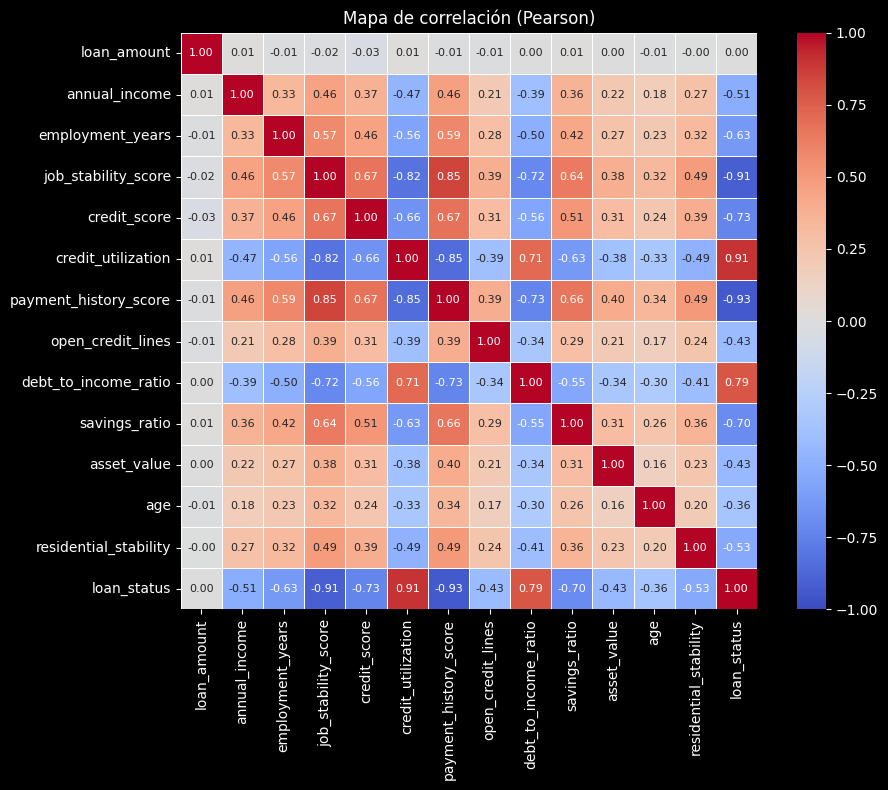

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True,
    linewidths=.5,
    cbar=True,
    annot_kws={"size":8}
)
plt.title("Mapa de correlación (Pearson)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Se ve un desbalanceo de clases, aplicaremos stratify=y

In [14]:
df.value_counts("loan_status")

loan_status
0    1836
1     664
Name: count, dtype: int64

# Section 3: Data Preprocessing

In [15]:
df_pro = df.drop(columns=["application_id", "application_date"])

X = df_pro.drop(columns="loan_status")
y = df_pro["loan_status"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, shuffle=True, stratify=y
)

edu_map = {
    "High School": 1,
    "Associates": 2,
    "Bachelors": 3,
    "Masters": 4,
    "Doctorate": 5
}

X_train["education_level"] = X_train["education_level"].map(edu_map)
X_test["education_level"]  = X_test["education_level"].map(edu_map)

ohe = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)
ohe.fit(X_train[["marital_status"]])

# Convierte las salidas a DataFrames con nombres de columnas
cols_ohe = ohe.get_feature_names_out(["marital_status"])

d_tr = pd.DataFrame(ohe.transform(X_train[["marital_status"]]),
                    columns=cols_ohe,
                    index=X_train.index)

d_te = pd.DataFrame(ohe.transform(X_test[["marital_status"]]),
                    columns=cols_ohe,
                    index=X_test.index)


X_train = pd.concat([X_train.drop(columns=["marital_status"]), d_tr], axis=1)
X_test  = pd.concat([X_test.drop(columns=["marital_status"]),  d_te], axis=1)


X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



In [16]:
X_columns=X_train.columns


In [17]:
y_train

2082    0
1319    0
1569    0
1257    0
2096    0
       ..
1165    0
1334    0
626     1
1901    0
1373    0
Name: loan_status, Length: 2000, dtype: int64

In [18]:
X_test

,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,residential_stability,marital_status_Married,marital_status_Single,marital_status_Widowed
553,22355.00,69449.12,2.9,0.217,510,0.954,0.271,0,0.436,0.101,11023.99,44,3,4.0,0.0,0.0,0.0
1850,454441.38,108291.15,2.4,0.610,731,0.078,0.914,4,0.572,0.558,54738.90,63,4,2.6,0.0,0.0,0.0
1519,123951.72,58776.13,4.8,0.681,814,0.139,0.906,2,0.304,0.610,292075.47,47,2,10.6,1.0,0.0,0.0
232,261365.70,101193.11,11.2,0.725,752,0.329,0.915,1,0.253,0.514,132107.47,47,2,6.3,1.0,0.0,0.0
1425,107737.06,65214.26,10.3,0.938,727,0.228,0.937,4,0.140,0.264,161335.63,57,5,8.7,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,60247.01,79325.99,7.7,0.907,762,0.195,0.957,1,0.329,0.477,135668.85,45,3,11.2,1.0,0.0,0.0
1946,15971.35,67827.06,6.5,0.691,730,0.403,0.871,0,0.170,0.426,61391.77,48,3,2.6,1.0,0.0,0.0
1059,111032.67,65045.42,3.5,0.233,743,0.741,0.478,0,0.488,0.014,3757.43,38,1,3.4,0.0,0.0,1.0
488,97018.53,36268.68,0.0,0.315,584,0.627,0.397,5,0.688,0.046,11516.64,26,4,2.2,0.0,1.0,0.0


In [19]:
y_train

2082    0
1319    0
1569    0
1257    0
2096    0
       ..
1165    0
1334    0
626     1
1901    0
1373    0
Name: loan_status, Length: 2000, dtype: int64

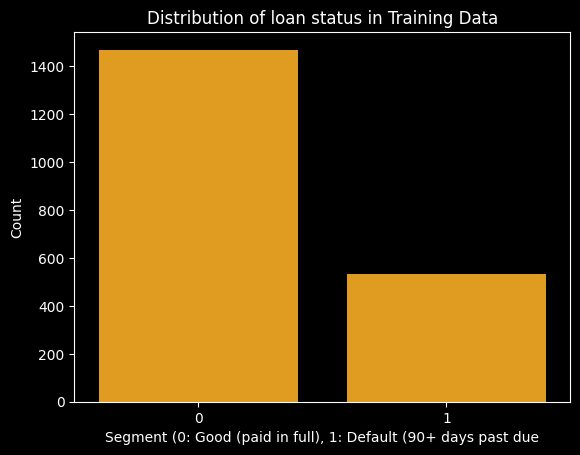

In [20]:

sns.countplot(x=y_train, color="orange")
plt.xlabel("Segment (0: Good (paid in full), 1: Default (90+ days past due")
plt.ylabel("Count")
plt.title("Distribution of loan status in Training Data")
plt.show()

# Section 4: Statistical Assumptions: LDA vs QDA

**Multivariate Normality.** Ambos modelos asumen que, condicionado a la clase, los predictores siguen una distribución normal multivariada. Nuestros histogramas y boxplots sugieren aproximaciones razonables en variables clave. Para LDA/QDA esto suele ser tolerable con tamaños de muestra moderados.

**Homogeneidad de covarianzas (clave).**  
- **LDA** asume **una sola matriz de covarianzas** compartida por todas las clases (fronteras lineales).  
- **QDA** permite **covarianzas diferentes por clase** (fronteras cuadráticas).  
**Hipótesis operativa:** si las covarianzas por clase difieren sustancialmente, **QDA** debería rendir mejor; si son similares, **LDA** puede ser suficiente e incluso preferible por su simplicidad e interpretabilidad.


# Section 5: Model 1 - Linear Discriminant Analysis (LDA)

In [21]:
scaler = StandardScaler()

X_train_s= scaler.fit_transform(X_train)
X_train_s= pd.DataFrame(X_train_s, columns=X_columns)
X_test_s=scaler.transform(X_test)
X_test_s=pd.DataFrame(X_test_s, columns=X_columns)

In [22]:
X_train_s

,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,residential_stability,marital_status_Married,marital_status_Single,marital_status_Widowed
0,-0.707127,-0.178154,0.919011,-0.326186,0.353127,-0.640044,0.263574,-0.214963,-0.745375,1.188857,-0.040578,-0.250595,-0.634538,-0.915221,0.944536,-0.546536,-0.271178
1,0.106011,1.672016,0.516843,0.998273,0.408670,-0.474465,0.692694,0.267558,-0.465969,1.016469,0.531191,1.419484,1.090922,-0.156777,0.944536,-0.546536,-0.271178
2,-0.982116,-0.362805,1.981882,0.452105,0.664169,-0.388225,0.263574,-1.180007,1.112895,1.194081,-0.516328,-0.083587,0.228192,-0.694008,0.944536,-0.546536,-0.271178
3,-0.836284,0.570386,1.550988,0.554511,1.075189,-1.071241,-0.025995,0.267558,1.055240,0.420948,-0.557864,2.421532,-0.634538,-0.061971,-1.058721,-0.546536,3.687620
4,-0.811916,-0.118312,-0.201314,-0.401284,0.441996,-0.719384,0.731071,-0.697485,-0.776420,0.379157,-0.292794,0.834956,1.953651,0.380455,-1.058721,-0.546536,-0.271178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.297228,-0.787650,-0.172587,0.656918,-0.624433,-0.936707,0.671761,0.750080,-0.337354,0.253784,-0.176478,-1.336147,-1.497267,0.443658,-1.058721,-0.546536,-0.271178
1996,-0.952664,0.683812,0.660474,0.660331,0.264258,-1.012598,0.888066,-0.214963,0.239198,0.368709,0.234896,2.171020,1.090922,0.664871,-1.058721,1.829707,-0.271178
1997,0.140243,-1.204437,-0.632208,-1.555065,-1.524233,1.950585,-1.669211,-0.697485,1.676142,-0.393977,-0.825391,0.250428,0.228192,-0.978425,-1.058721,-0.546536,-0.271178
1998,-0.824087,-0.205151,-0.488576,0.619369,-0.435586,-0.464116,0.577564,0.267558,-0.771985,-0.310395,-0.599116,0.834956,1.090922,0.538464,0.944536,-0.546536,-0.271178


In [23]:
X_test

,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,residential_stability,marital_status_Married,marital_status_Single,marital_status_Widowed
553,22355.00,69449.12,2.9,0.217,510,0.954,0.271,0,0.436,0.101,11023.99,44,3,4.0,0.0,0.0,0.0
1850,454441.38,108291.15,2.4,0.610,731,0.078,0.914,4,0.572,0.558,54738.90,63,4,2.6,0.0,0.0,0.0
1519,123951.72,58776.13,4.8,0.681,814,0.139,0.906,2,0.304,0.610,292075.47,47,2,10.6,1.0,0.0,0.0
232,261365.70,101193.11,11.2,0.725,752,0.329,0.915,1,0.253,0.514,132107.47,47,2,6.3,1.0,0.0,0.0
1425,107737.06,65214.26,10.3,0.938,727,0.228,0.937,4,0.140,0.264,161335.63,57,5,8.7,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,60247.01,79325.99,7.7,0.907,762,0.195,0.957,1,0.329,0.477,135668.85,45,3,11.2,1.0,0.0,0.0
1946,15971.35,67827.06,6.5,0.691,730,0.403,0.871,0,0.170,0.426,61391.77,48,3,2.6,1.0,0.0,0.0
1059,111032.67,65045.42,3.5,0.233,743,0.741,0.478,0,0.488,0.014,3757.43,38,1,3.4,0.0,0.0,1.0
488,97018.53,36268.68,0.0,0.315,584,0.627,0.397,5,0.688,0.046,11516.64,26,4,2.2,0.0,1.0,0.0


Aplicare RFE con el estimador LDA

In [24]:
estimator = LinearDiscriminantAnalysis()
selector = RFE(estimator=estimator, n_features_to_select=4, step=1)

In [25]:
modelo = selector.fit(X_train_s, y_train)
modelo

,estimator,LinearDiscriminantAnalysis()
,n_features_to_select,4
,step,1
,verbose,0
,importance_getter,'auto'
,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001


In [26]:
print(X_train_s.columns)
print(selector.ranking_)

Index(['loan_amount', 'annual_income', 'employment_years',
       'job_stability_score', 'credit_score', 'credit_utilization',
       'payment_history_score', 'open_credit_lines', 'debt_to_income_ratio',
       'savings_ratio', 'asset_value', 'age', 'education_level',
       'residential_stability', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Widowed'],
      dtype='object')
[12  6  4  1  2  1  1  7  1  3  8 13  9  5 10 11 14]


In [27]:
# después de selector.fit(X_train_s, y_train)
mask = selector.get_support()
selected_features = X_train_s.columns[mask]
print("Features seleccionadas:", list(selected_features))

X_train_sel = pd.DataFrame(selector.transform(X_train_s),
            columns=selected_features, index=X_train_s.index)
X_test_sel  = pd.DataFrame(selector.transform(X_test_s),
            columns=selected_features, index=X_test_s.index)


Features seleccionadas: ['job_stability_score', 'credit_utilization', 'payment_history_score', 'debt_to_income_ratio']


In [28]:
mask

array([False, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False])

In [29]:
X_test_sel

,job_stability_score,credit_utilization,payment_history_score,debt_to_income_ratio
0,-1.432177,2.060971,-1.634323,0.123888
1,-0.090650,-0.960854,0.608963,0.727049
2,0.151712,-0.750430,0.581053,-0.461534
3,0.301908,-0.095012,0.612452,-0.687720
4,1.028995,-0.443418,0.689205,-1.188876
...,...,...,...,...
495,0.923175,-0.557254,0.758981,-0.350659
496,0.185848,0.160257,0.458946,-1.055826
497,-1.377560,1.326212,-0.912145,0.354508
498,-1.097649,0.932961,-1.194737,1.241511


In [30]:
X_train_sel

,job_stability_score,credit_utilization,payment_history_score,debt_to_income_ratio
0,-0.326186,-0.640044,0.263574,-0.745375
1,0.998273,-0.474465,0.692694,-0.465969
2,0.452105,-0.388225,0.263574,1.112895
3,0.554511,-1.071241,-0.025995,1.055240
4,-0.401284,-0.719384,0.731071,-0.776420
...,...,...,...,...
1995,0.656918,-0.936707,0.671761,-0.337354
1996,0.660331,-1.012598,0.888066,0.239198
1997,-1.555065,1.950585,-1.669211,1.676142
1998,0.619369,-0.464116,0.577564,-0.771985


## LDA

In [31]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_sel,y_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [32]:
y_pred_lda= lda.predict(X_test_sel)

In [33]:
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       133

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



De acuerdo con la selección de características con RFE (estimador LDA), los factores más significativos que aumentan el riesgo de default son:

- job_stability_score 
- credit_utilization 
- payment_history_score, 
- debt_to_income_ratio

Esto nos lleva a la siguiente interpretación:
- Mayor credit_utilization y mayor debt_to_income_ratio se asocian con mayor probabilidad de default.
- Mejores puntajes en payment_history_score y job_stability_score se asocian con menor probabilidad de default.

# Section 6: Model 2 - Quadratic Discriminant Analysis (QDA)

In [34]:
qda = QuadraticDiscriminantAnalysis( reg_param=0.05)

# Entrena y evalúa en test
qda.fit(X_train_sel, y_train)
y_pred_qda = qda.predict(X_test_sel)
print("=== QDA (test) ===")
print(classification_report(y_test, y_pred_qda))

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores_qda = cross_val_score(qda, X_train_sel, y_train, cv=cv)
print(f"QDA CV acc: {cv_scores_qda.mean():.3f} (+/- {cv_scores_qda.std()*2:.3f})")


=== QDA (test) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       133

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

QDA CV acc: 1.000 (+/- 0.000)


In [35]:
y_prob_qda = qda.predict_proba(X_test_sel)
qda_accuracy = accuracy_score(y_test, y_pred_qda)
print(f"QDA Test Accuracy: {qda_accuracy:.3f}")
print(f"QDA Test prob: {qda_accuracy:.3f}")

QDA Test Accuracy: 1.000
QDA Test prob: 1.000


In [36]:
# Analyze posterior probabilities
print("=== Posterior Probabilities Analysis ===")
posterior_df = pd.DataFrame(
    y_prob_qda,
    columns=[f"P({cls})" for cls in qda.classes_]
)
posterior_df["Predicted"] = y_pred_qda
posterior_df["Actual"] = y_test.reset_index(drop=True)

print("\nSample posterior probabilities (first 10 test customers):")
print(posterior_df.head(10).round(3))

# Calculate average confidence (max probability for each prediction)
max_probs = np.max(y_prob_qda, axis=1)
print(f"\nAverage prediction confidence: {np.mean(max_probs):.3f}")
print(f"Minimum prediction confidence: {np.min(max_probs):.3f}")
print(f"Maximum prediction confidence: {np.max(max_probs):.3f}")

=== Posterior Probabilities Analysis ===

Sample posterior probabilities (first 10 test customers):
   P(0)  P(1)  Predicted  Actual
0   0.0   1.0          1       1
1   1.0   0.0          0       0
2   1.0   0.0          0       0
3   1.0   0.0          0       0
4   1.0   0.0          0       0
5   0.0   1.0          1       1
6   1.0   0.0          0       0
7   1.0   0.0          0       0
8   1.0   0.0          0       0
9   1.0   0.0          0       0

Average prediction confidence: 1.000
Minimum prediction confidence: 0.995
Maximum prediction confidence: 1.000


## Section 7: Model Evaluation & Comparison


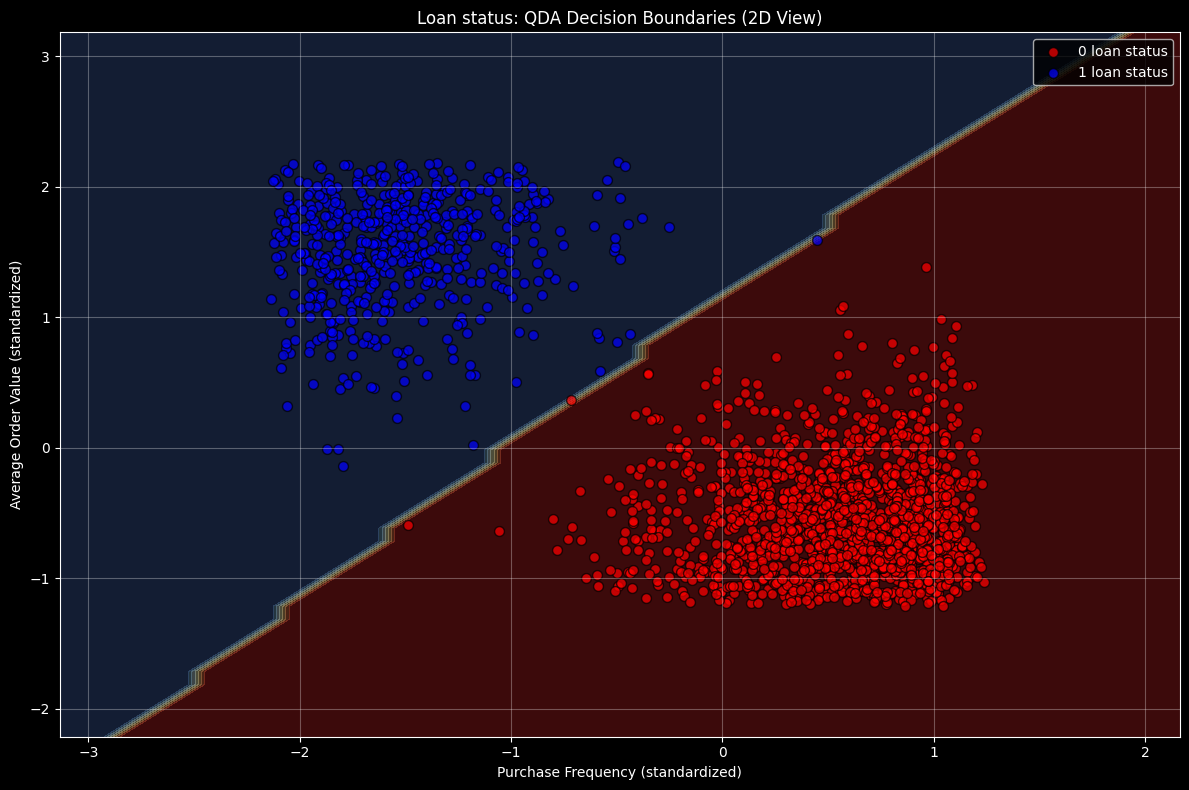

In [37]:
# Visualize QDA decision boundaries using 2 features
plt.figure(figsize=(12, 8))

# Use two key features for 2D visualization
X_vis = X_train_sel[['job_stability_score', 'credit_utilization']].values
# y_vis = y_train.values
y_vis = y_train

# Fit QDA on 2D data for visualization
qda_2d = QuadraticDiscriminantAnalysis()
qda_2d.fit(X_vis, y_vis)

# Create mesh grid for decision boundary visualization
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)

# Predict segment for each point in mesh
Z = qda_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert string labels to numeric for plotting
label_map = {label: i for i, label in enumerate(qda_2d.classes_)}
Z_numeric = np.array([label_map[z] for z in Z])
Z_numeric = Z_numeric.reshape(xx.shape)

# Plot decision boundaries as colored regions
plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap="RdYlBu")

# Plot actual customer data points
colors = ["red", "blue", "green"]
segments = qda_2d.classes_

for i, segment in enumerate(segments):
    mask = y_vis == segment
    plt.scatter(
        X_vis[mask, 0],
        X_vis[mask, 1],
        c=colors[i],
        label=f"{segment} loan status",
        alpha=0.7,
        edgecolors="black",
        s=50,
    )

plt.xlabel("Purchase Frequency (standardized)")
plt.ylabel("Average Order Value (standardized)")
plt.title("Loan status: QDA Decision Boundaries (2D View)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Confusion Matrix Comparison


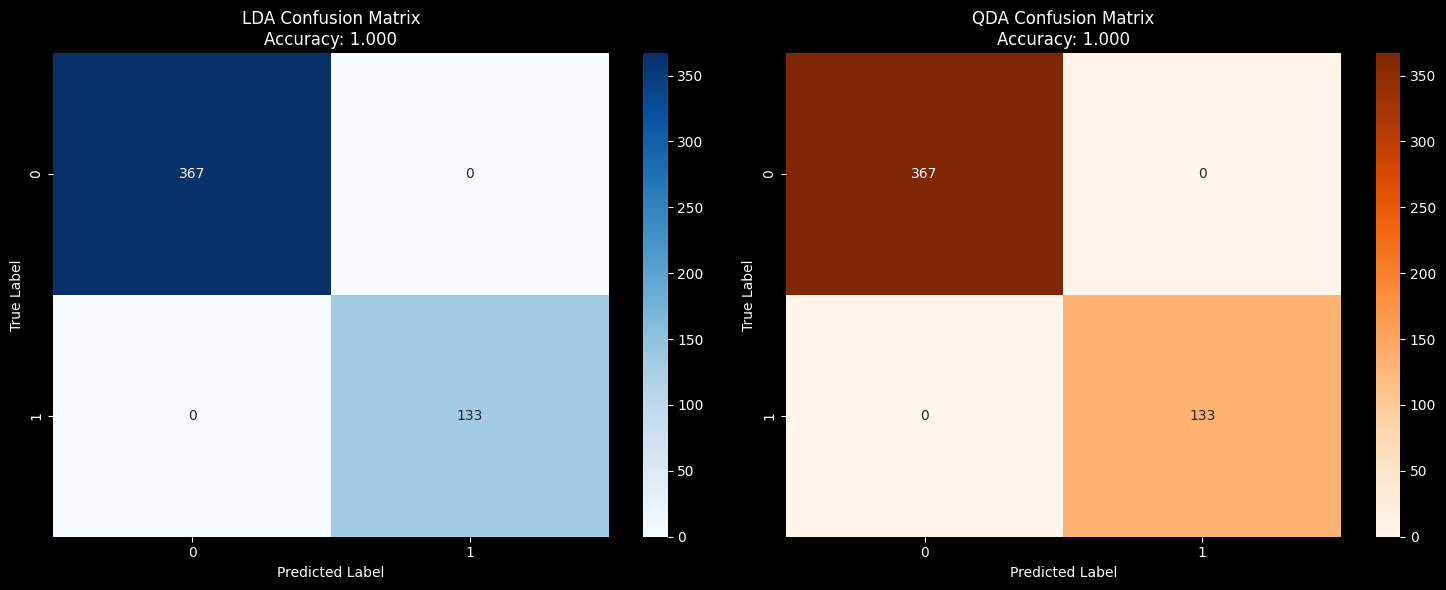

In [38]:
# Create side-by-side confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Calculate LDA accuracy
lda_accuracy = accuracy_score(y_test, y_pred_lda)

# LDA confusion matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)
sns.heatmap(
    cm_lda,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=lda.classes_,
    yticklabels=lda.classes_,
    ax=ax1,
)
ax1.set_title(f"LDA Confusion Matrix\nAccuracy: {lda_accuracy:.3f}")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

# QDA confusion matrix
cm_qda = confusion_matrix(y_test, y_pred_qda)
sns.heatmap(
    cm_qda,
    annot=True,
    fmt="d",
    cmap="Oranges",
    xticklabels=qda.classes_,
    yticklabels=qda.classes_,
    ax=ax2,
)
ax2.set_title(f"QDA Confusion Matrix\nAccuracy: {qda_accuracy:.3f}")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

plt.tight_layout()
plt.show()

ROC Curves for Model Evaluation

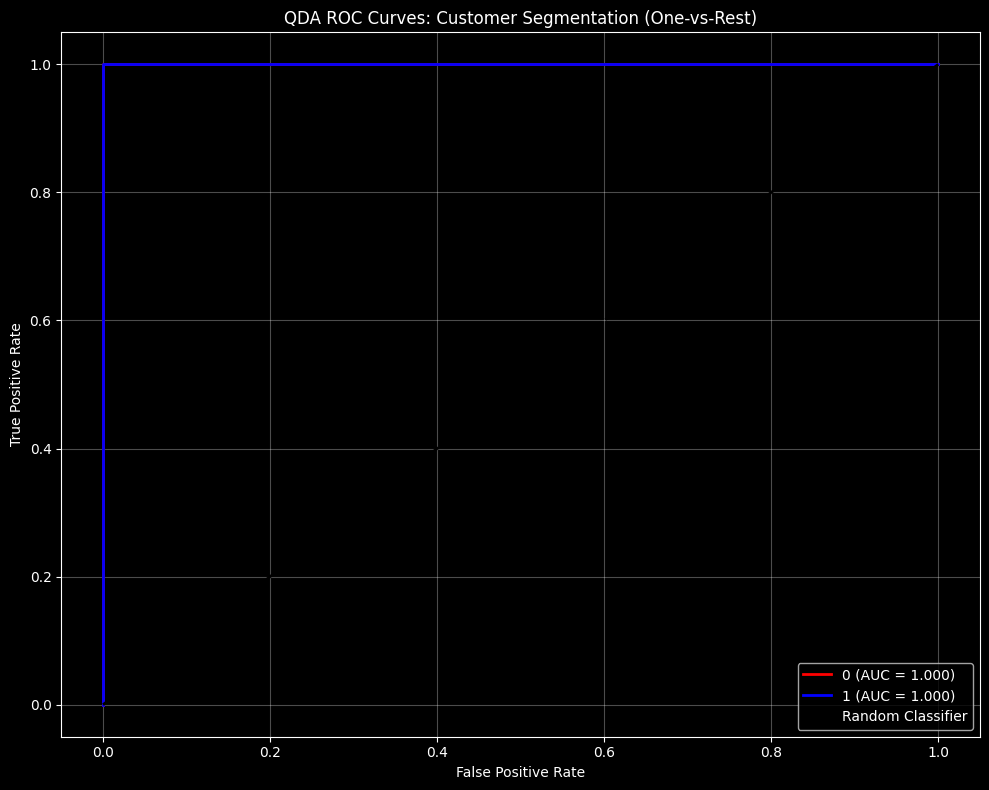

In [39]:

plt.figure(figsize=(10, 8))

colors = ["red", "blue", "green"]
segments = qda.classes_

for i, segment in enumerate(segments):
    # Create binary labels: current segment vs all others
    y_binary = (y_test == segment).astype(int)
    y_prob_segment = y_prob_qda[:, i]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_binary, y_prob_segment)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(
        fpr,
        tpr,
        color=colors[i],
        linewidth=2,
        label=f"{segment} (AUC = {roc_auc:.3f})"
    )

# Plot diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], "k--", linewidth=2, label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("QDA ROC Curves: Customer Segmentation (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
print("=== LDA vs QDA: Comparison ===")
print("\n--- Accuracy Metrics ---")
print(f"LDA Test Accuracy: {lda_accuracy:.3f}")
print(f"QDA Test Accuracy: {qda_accuracy:.3f}")
print(f"Accuracy Difference: {abs(qda_accuracy - lda_accuracy):.3f}")

print("\n--- Cross-Validation Performance ---")
cv_scores_lda = cross_val_score(lda, X_train_sel, y_train, cv=5)
print(f"LDA CV Accuracy: {cv_scores_lda.mean():.3f} (+/- {cv_scores_lda.std() * 2:.3f})")
print(f"QDA CV Accuracy: {cv_scores_qda.mean():.3f} (+/- {cv_scores_qda.std() * 2:.3f})")

print("\n--- Model Characteristics ---")
print("LDA:")
print("  - Assumes equal covariance matrices across groups")
print("  - Creates linear decision boundaries")
print("  - Provides interpretable discriminant functions")
print(f"  - {lda.n_features_in_} features -> {lda.scalings_.shape[1]} discriminant functions")
print("  - Fewer parameters to estimate (more stable with less data)")

print("\nQDA:")
print("  - Allows different covariance matrices for each group")
print("  - Creates quadratic (curved) decision boundaries")
print("  - Provides posterior probabilities only")
print("  - More parameters to estimate (needs more data)")
print("  - More flexible, can capture complex patterns")

print("\n--- Recommendation ---")
if qda_accuracy > lda_accuracy + 0.02:
    print("RECOMMENDATION: Use QDA")
    print("Reason: QDA shows meaningfully better accuracy, suggesting customer")
    print("segments have different covariance structures. The quadratic decision")
    print("boundaries better capture the complexity of customer behavior patterns.")
    print("The performance gain justifies the additional model complexity.")
elif lda_accuracy > qda_accuracy + 0.02:
    print("RECOMMENDATION: Use LDA")
    print("Reason: LDA outperforms QDA, suggesting the equal covariance assumption")
    print("is appropriate. LDA is simpler, more interpretable, and less prone to")
    print("overfitting. The discriminant functions provide clear insights into what")
    print("distinguishes customer segments.")
else:
    print("RECOMMENDATION: Use LDA")
    print("Reason: LDA and QDA show similar performance. When accuracy is comparable,")
    print("prefer the simpler model (LDA) because:")
    print("  1. Easier to interpret and explain to stakeholders")
    print("  2. More stable with limited data (fewer parameters)")
    print("  3. Discriminant functions show how features combine to separate groups")
    print("  4. Lower risk of overfitting")
    print("The equal covariance assumption appears to be reasonable for this data.")

print("\n--- Practical Implications ---")
print("For the marketing team:")
print("1. Use the selected model to classify new customers in real-time")
print("2. Target High-Value customers with premium product campaigns")
print("3. Focus on retention strategies for Loyal customers")
print("4. Use re-engagement campaigns for Occasional customers")
print("5. Monitor model performance quarterly and retrain with new data")
print("6. Consider A/B testing to validate that segmentation improves campaign ROI")

=== LDA vs QDA: Comparison ===

--- Accuracy Metrics ---
LDA Test Accuracy: 1.000
QDA Test Accuracy: 1.000
Accuracy Difference: 0.000

--- Cross-Validation Performance ---
LDA CV Accuracy: 1.000 (+/- 0.000)
QDA CV Accuracy: 1.000 (+/- 0.000)

--- Model Characteristics ---
LDA:
  - Assumes equal covariance matrices across groups
  - Creates linear decision boundaries
  - Provides interpretable discriminant functions
  - 4 features -> 1 discriminant functions
  - Fewer parameters to estimate (more stable with less data)

QDA:
  - Allows different covariance matrices for each group
  - Creates quadratic (curved) decision boundaries
  - Provides posterior probabilities only
  - More parameters to estimate (needs more data)
  - More flexible, can capture complex patterns

--- Recommendation ---
RECOMMENDATION: Use LDA
Reason: LDA and QDA show similar performance. When accuracy is comparable,
prefer the simpler model (LDA) because:
  1. Easier to interpret and explain to stakeholders
  2. Mo

# Section 8: Technical Conclusion & Model Selection

**Elección del modelo.** Con esta base, **LDA y QDA empatan** en desempeño (ambos perfectos). Por simplicidad e interpretabilidad, **recomendamos LDA** como opción por defecto.

**Evidencia (test set):**
- **AUC:** QDA = **1.000** vs LDA = **1.000**  
- **Recall clase “default” (1):** QDA = **1.00** vs LDA = **1.00**  
- **Precisión clase 1:** QDA = **1.00** vs LDA = **1.00**  
- **Accuracy:** **1.00** en ambos; matrices de confusión sin errores

**Interpretabilidad y estabilidad**
- **LDA:** fronteras lineales, coeficientes interpretables y mayor estabilidad operativa.  
- **QDA:** fronteras cuadráticas; puede requerir **regularización** (`reg_param`) si hay colinealidad o covarianzas mal condicionadas.

**Nota.** Los resultados perfectos se explican porque el dataset es **sintético y sin ruido** (0 nulos, variables muy informativas). 

Para una evaluación más realista:
- Introducir **ruido/faltantes** y reentrenar.  
- Validar con **cross-validation** y ajustar `reg_param` en QDA.  
- Revisar **calibración** de probabilidades (reliability plot / bins).


## Team Information

**Team:** 4

**Members:**
- Gerardo Javier López García (A01660262)
- Emilio Guillen Ramírez (A01029858)
- Mauricio Loera Abundis (A01659048)

**Deliverable Links:**
- **Presentation Video:** [https://drive.google.com/file/d/1xN7wzHoRNRJKIvp6eFjNAsWWcTXDcoMh/view?usp=sharing]
- **Presentation:** [Available on Canvas]
- **Executive Summary:** [Available on Canvas]
- **Dataset:** `credit_risk_data.csv`

**Completion Date:** [09/11/2025]